In [1]:
import pandas as pd
import numpy as np
import geopandas
import geoplot
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sleep_data_sampled.csv')
# i used Sleep_Data_Sampled for this page
df.head(100)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Male,36,Lawyer,7.70,8,82,6,Normal,120/80,70,8000,Healthy
96,97,Female,42,Engineer,8.00,8,52,4,Normal,120/80,68,6500,Healthy
97,98,Male,36,Lawyer,7.45,8,70,6,Normal Weight,130/85,69,7500,Healthy
98,99,Female,45,Accountant,7.85,8,45,4,Normal,125/80,66,6000,Healthy


In [3]:
average_quality_by_occupation = df.groupby('Occupation')['Sleep Duration'].mean()

print(average_quality_by_occupation)

Occupation
Accountant              7.048765
Doctor                  7.115814
Engineer                7.559104
Lawyer                  7.327873
Manager                 7.115909
Nurse                   7.039099
Sales Representative    6.453478
Salesperson             6.508232
Scientist               6.486010
Software Engineer       6.606818
Teacher                 6.682856
Name: Sleep Duration, dtype: float64


<Axes: xlabel='Occupation'>

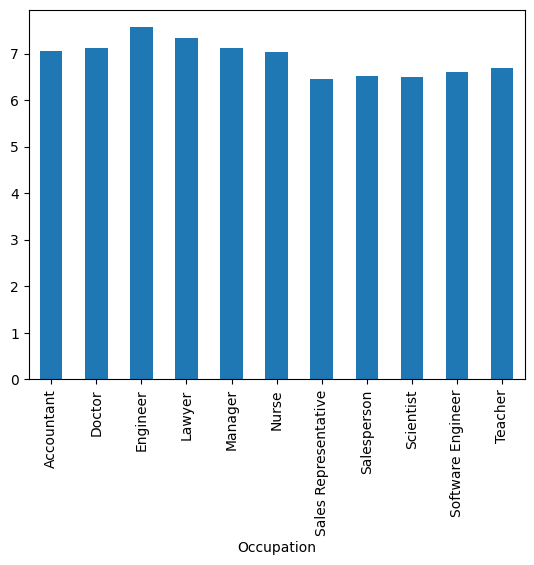

In [4]:
average_quality_by_occupation.reset_index()
average_quality_by_occupation.plot(kind = 'bar', x = 'Occupation', y ='Sleep Duration')

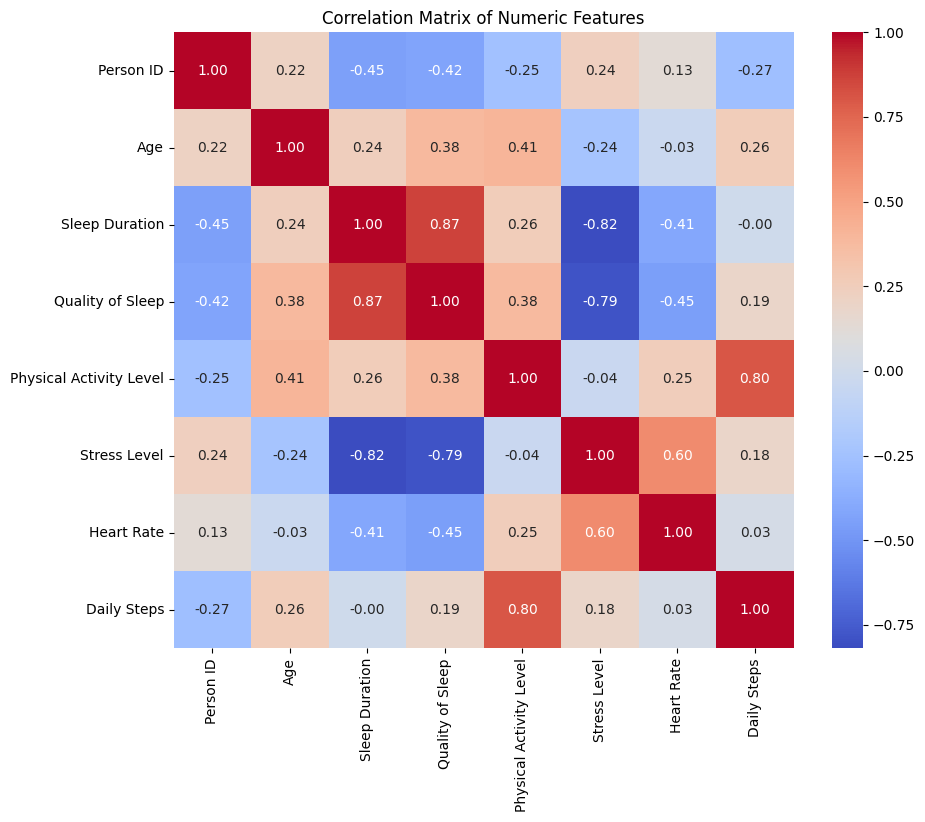

Sleep Duration             1.000000
Quality of Sleep           0.871070
Physical Activity Level    0.258421
Age                        0.242359
Daily Steps               -0.003157
Heart Rate                -0.411150
Person ID                 -0.449291
Stress Level              -0.819078
Name: Sleep Duration, dtype: float64
Quality of Sleep           1.000000
Sleep Duration             0.871070
Age                        0.382186
Physical Activity Level    0.381601
Daily Steps                0.188875
Person ID                 -0.423943
Heart Rate                -0.451876
Stress Level              -0.785485
Name: Quality of Sleep, dtype: float64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Extract correlations with sleep_duration and quality_of_sleep
sleep_duration_corr = correlation_matrix['Sleep Duration'].sort_values(ascending=False)
quality_of_sleep_corr = correlation_matrix['Quality of Sleep'].sort_values(ascending=False)

print( sleep_duration_corr)
print( quality_of_sleep_corr)